# Apropiación del Notebook de Hugo Peña

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

^C
Traceback (most recent call last):
  File "/root/venv/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
  File "/root/venv/lib/python3.10/site-packages/pip/__init__.py", line 1, in <module>
    from typing import List, Optional
  File "/usr/local/lib/python3.10/typing.py", line 24, in <module>
    import collections.abc
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 up

## Importamos librerias

In [2]:
import cv2
import random
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [31]:
!wget https://media.gq.com.mx/photos/5dfd16630e681900084be9eb/16:9/w_1600,c_limit/beard.jpg


--2025-04-08 23:46:04--  https://media.gq.com.mx/photos/5dfd16630e681900084be9eb/16:9/w_1600,c_limit/beard.jpg
Resolving media.gq.com.mx (media.gq.com.mx)... 18.160.18.92, 18.160.18.96, 18.160.18.9, ...
Connecting to media.gq.com.mx (media.gq.com.mx)|18.160.18.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179472 (175K) [image/jpeg]
Saving to: ‘beard.jpg’

beard.jpg           100%[===================>] 175.27K  --.-KB/s    in 0.008s  

2025-04-08 23:46:06 (21.1 MB/s) - ‘beard.jpg’ saved [179472/179472]



## Cargamos una imágen de la web

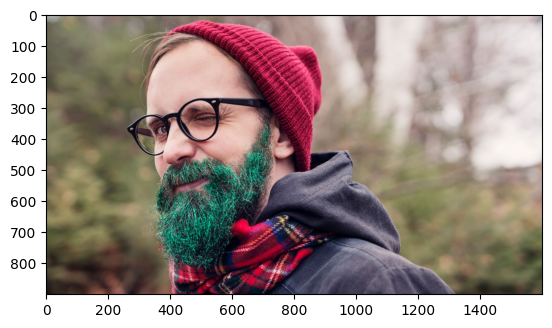

In [33]:
from skimage.io import imread  # Import imread function 

imagen = imread('beard.jpg')
plt.imshow(imagen)
plt.show()

## La mostramos por pantalla

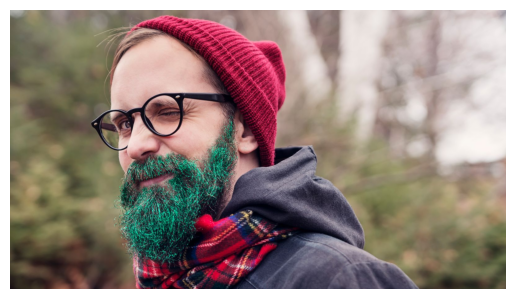

In [35]:
plt.axis("off")
plt.imshow(imagen)

## Como vemos que está en BGR (ya que cv2 trabaja en ese formato), la pasamos a RGB que es la forma tradicional en que vemos las fotos.

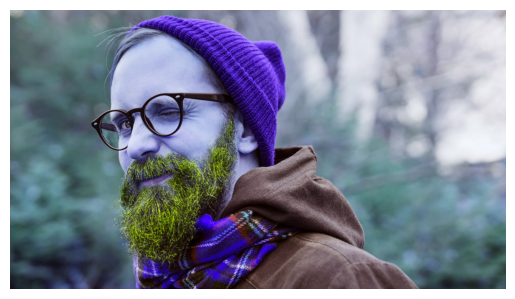

In [37]:
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(imagen_rgb)

## Realizamos una iteración por los disintos kernels y sigmas más frecuentes para tener varias muestras y elegir alguna o acercarnos a algún objetivo en particular.

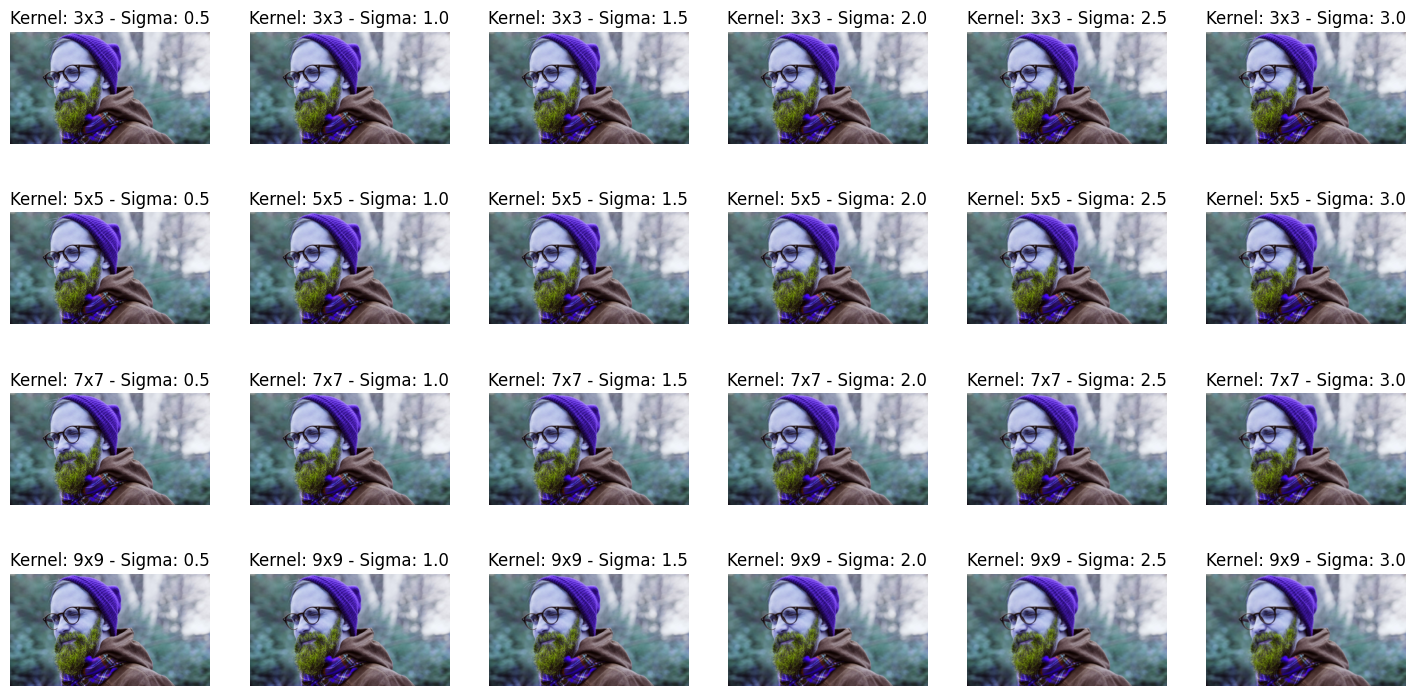

In [39]:
kernel_sizes = [3, 5, 7, 9]
sigma_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
plt.figure(figsize=(18, 9))
cont = 1
for i in kernel_sizes: # este for está iterando sobre la lista de kernels
    for sigma in sigma_values: # este for está iterando sobre la lista de sigmas
        imagen_blur = cv2.GaussianBlur(imagen_rgb, (i, i), sigma)
        plt.subplot(4, 6, cont)
        plt.imshow(imagen_blur)
        plt.title(f"Kernel: {i}x{i} - Sigma: {round(sigma, 1)}")
        plt.axis('off')
        cont += 1
plt.show()



## Una vez que vimos alguna muestra que nos guste, podremos seleccionarla para trabajar con ella.

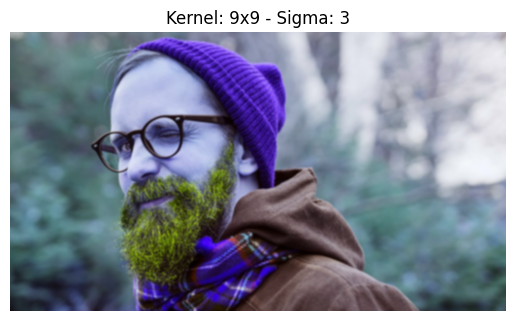

In [41]:
kernel_elegido = 9 # Acá podemos cambiar el valor de los kernels que querramos
sigma_elegida = 3 # Acá podemos cambiar el valor de sigma que querramos
imagen_blur_elegida = cv2.GaussianBlur(imagen_rgb, (kernel_elegido,kernel_elegido), sigma_elegida)
plt.axis('off')
plt.title(f"Kernel: {kernel_elegido}x{kernel_elegido} - Sigma: {round(sigma_elegida, 1)}")
plt.imshow(imagen_blur_elegida) # recordar que si cambiamos el nombre de la variable de arriba, acá también hay que cambiarlo.

## Si nos nos gustó ninguna podemos probar kernels y sigmas aleatorios.

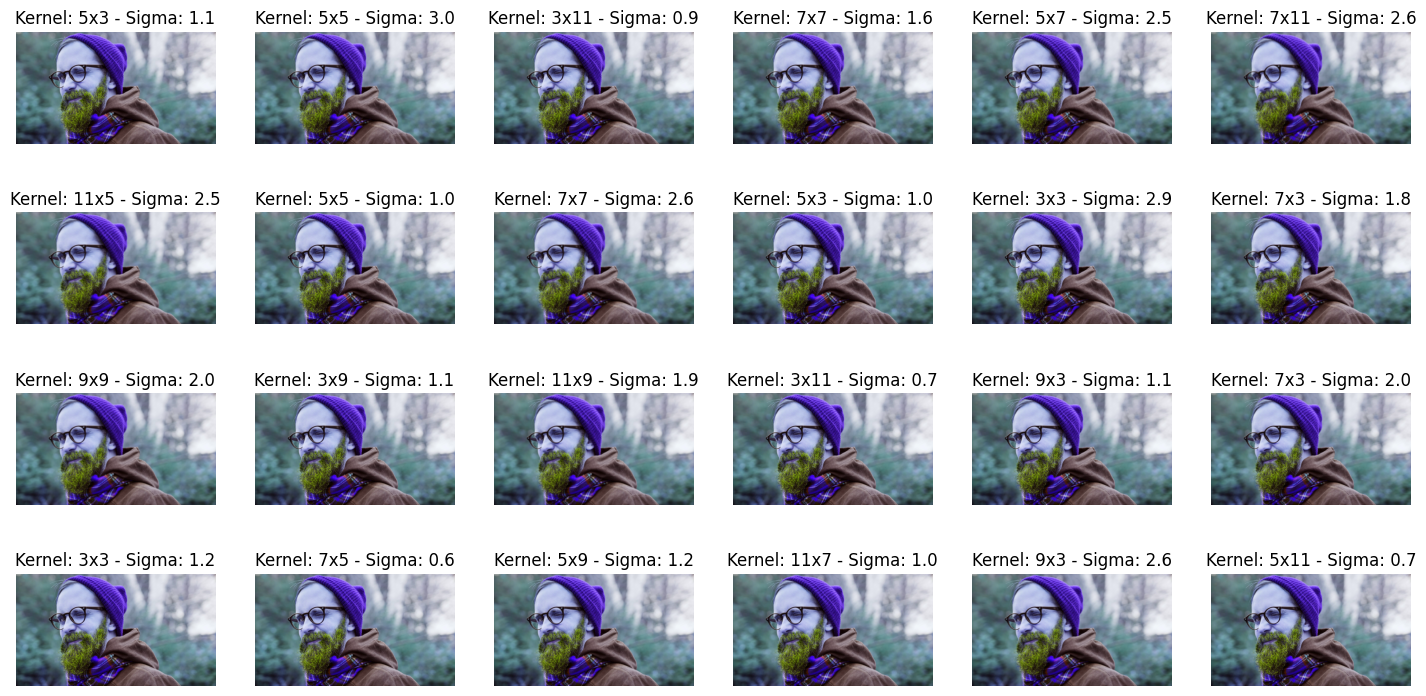

In [43]:
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24): # ahora por cada vuelta del for hay dos kernels por separado y una sigma, todos aleatorios dentro de un rango coherente.
      kernel1 = random.choice([3, 5, 7, 9, 11]) # primer kernel aleatorio entre 3,5,7,9,11
      kernel2 = random.choice([3, 5, 7, 9, 11]) # segundo kernel aleatorio entre 3,5,7,9,11
      sigma =  random.uniform(0.5, 3.0) # sigma aleatoria con valores entre 0.5 y 3.0
      imagen_blur = cv2.GaussianBlur(imagen_rgb, (kernel1, kernel2), sigma)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_blur)
      plt.title(f"Kernel: {kernel1}x{kernel2} - Sigma: {round(sigma, 1)}")
      plt.axis('off')
      cont += 1
plt.show()

## Algo un poco más loco, pero quizás efectivo..

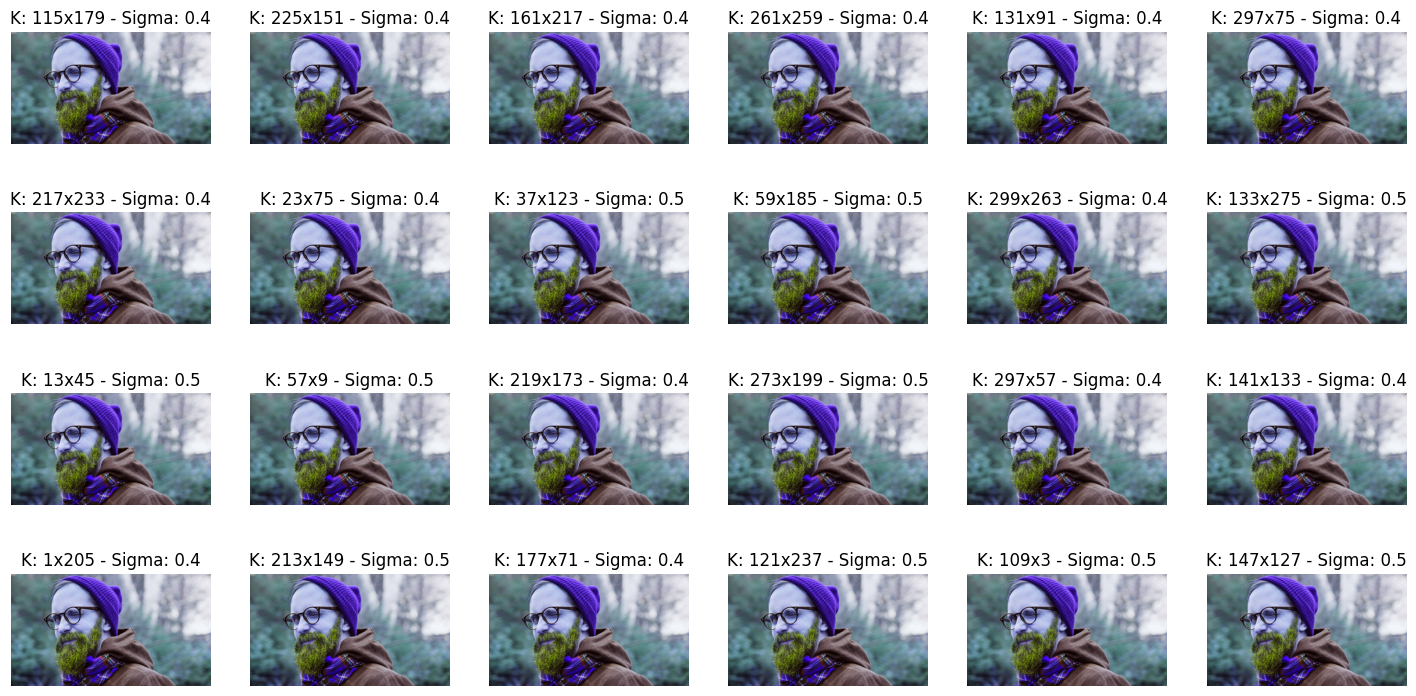

In [45]:
numeros_impares = list(range(1, 302, 2)) # creamos esta lista para que los kernels vayan desde 1 hasta 299 (solo los números impares)
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24):
      kernel1 = random.choice(numeros_impares) # primer kernel aleatorio
      kernel2 = random.choice(numeros_impares) # segundo kernel aleatorio
      sigma =  random.uniform(0.5, 0.39) #sigma aleatoria etre 0.5 y 39.0 (podríamos probar que pasa con una sigma negativa)
      imagen_blur = cv2.GaussianBlur(imagen_rgb, (kernel1, kernel2), sigma)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_blur)
      plt.title(f"K: {kernel1}x{kernel2} - Sigma: {round(sigma, 1)}")
      plt.axis('off')
      cont += 1
plt.show()

## Bueno me terminó gustando más esta !

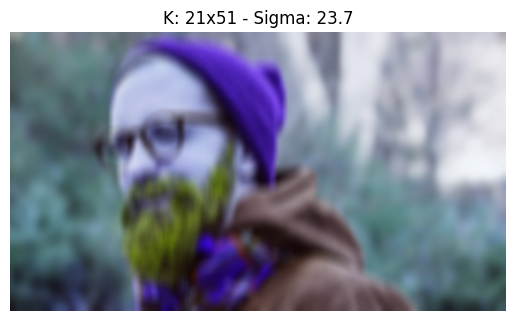

In [46]:
kernel1_elegido= 21 # acá podemos cambiar el primer kernel (recordar que tiene que ser impar)
kernel2_elegido = 51 # acá podemos cambiar el segundo kernel (recordar que tiene que ser impar)
sigma_elegida = 23.7 # acá podemos cambiar la sigma
imagen_blur_elegida = cv2.GaussianBlur(imagen_rgb, (kernel1_elegido,kernel2_elegido), sigma_elegida)
plt.title(f"K: {kernel1_elegido}x{kernel2_elegido} - Sigma: {round(sigma_elegida, 1)}")
plt.axis('off')
plt.imshow(imagen_blur_elegida) # recordar que si cambiamos el nombre de la variable de arriba, acá también hay que cambiarlo.

## Pasamos a escala de grises para poder continuar con el proceso.

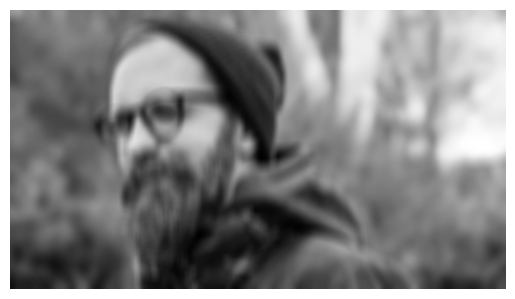

In [48]:
imagen_gris = cv2.cvtColor(imagen_blur_elegida, cv2.COLOR_RGB2GRAY)
plt.axis('off')
plt.imshow(imagen_gris, cmap='gray')

## Aplicamos método Canny e iteramos sobre distintos valores para ver que tipo de umbrales me permite una mejor detección de bordes, tener en cuenta que aveces la imágen puede ser un poco compleja, en dicho caso puede ejecutar varias veces el siguiente código hasta conseguir un resutado convicente, o volver al paso anterior para corregir el suavizado, o en última instancia cambiar de fotografía.

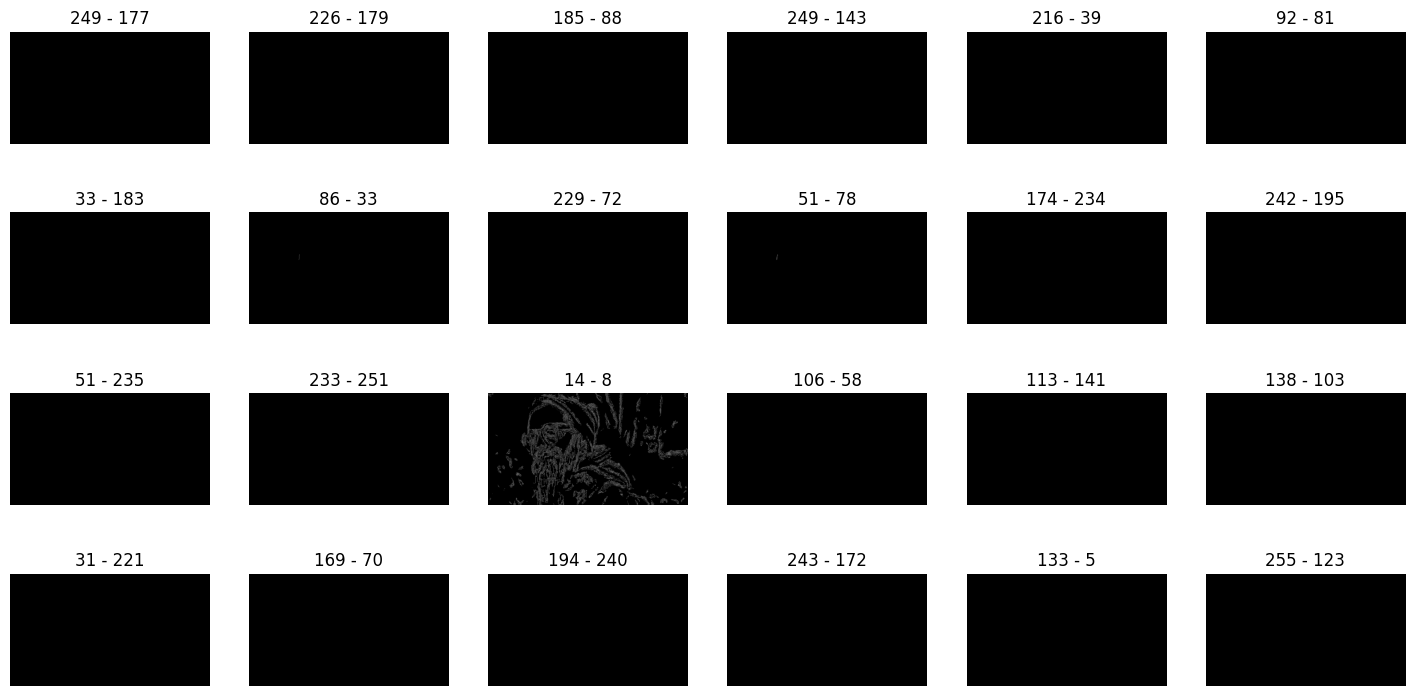

In [58]:
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24): # para cada vuelta del for hay dos umbrales aleatorios entre 0 y 255
      umbral1 = random.randint(0,255) # primer umbral aleatorio entre 0 y 255
      umbral2 = random.randint(0,255) # segundo umbral aleatorio entre 0 y 255
      imagen_canny = cv2.Canny(imagen_gris, umbral1, umbral2)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_canny, cmap='gray')
      plt.title(f"{umbral1} - {umbral2}")
      plt.axis('off')
      cont += 1
plt.show()

## Después de varias iteraciones en el fragmento de código anterior nos damos cuenta que los rangos más optimos de ubrales parecen moverse entre 8 y 25

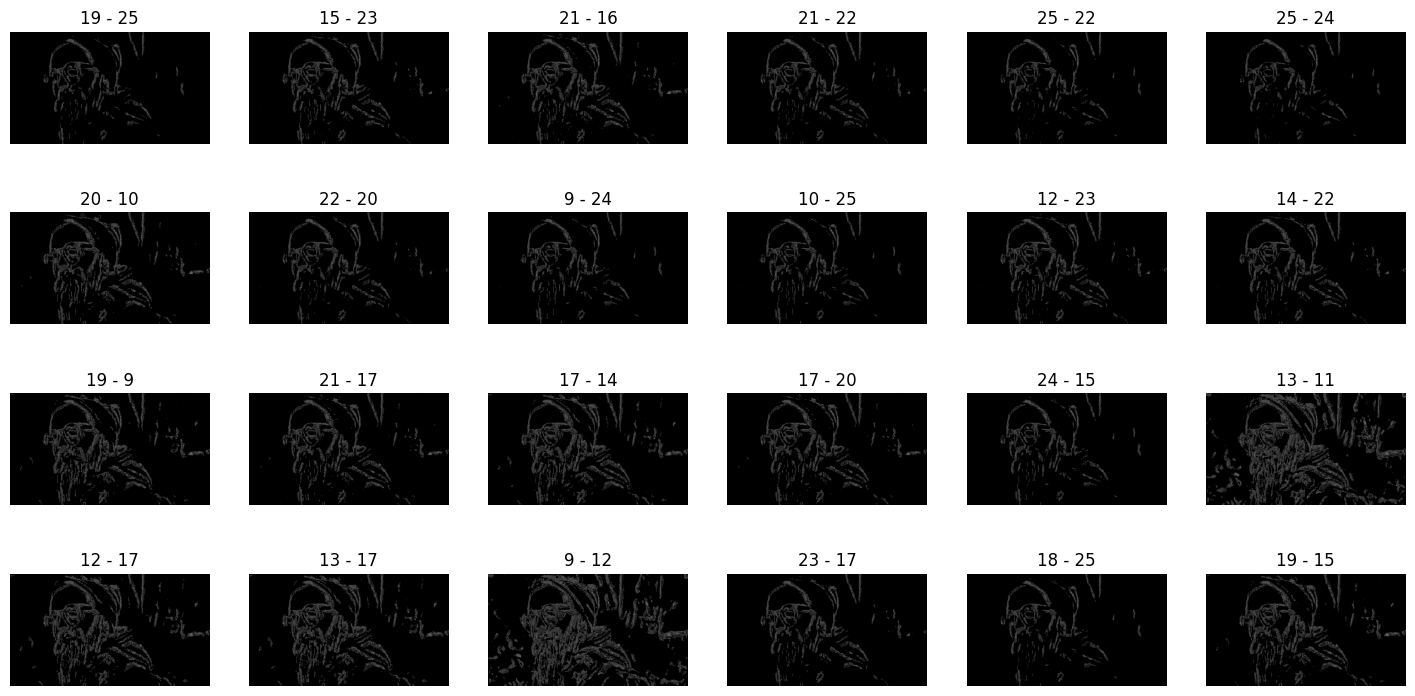

In [52]:
plt.figure(figsize=(18, 9))
cont = 1
for i in range(24):  # ahora para cada vuelta del for hay dos umbrales aleatorios entre 8 y 25
      umbral1 = random.randint(8,25) # primer umbral aleatorio entre 8 y 25
      umbral2 = random.randint(8,25) # segundo umbral aleatorio entre 8 y 25
      imagen_canny = cv2.Canny(imagen_gris, umbral1, umbral2)
      plt.subplot(4, 6, cont)
      plt.imshow(imagen_canny, cmap='gray')
      plt.title(f"{umbral1} - {umbral2}")
      plt.axis('off')
      cont += 1
plt.show()

## Por último elegimos a nuestro criterio

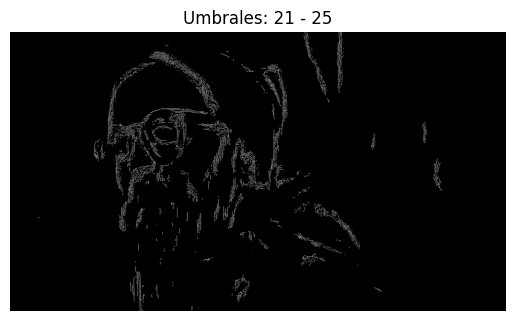

In [56]:
umbral1_elegido = 21 # acá podemos cambiar el primer umbral (no hace falta que sea impar)
umbral2_elegido = 25 # acá podemos cambiar el segundo umbral (no hace falta que sea impar)
imagen_canny_elegida = cv2.Canny(imagen_gris, umbral1_elegido, umbral2_elegido)
plt.title(f"Umbrales: {umbral1_elegido} - {umbral2_elegido}")
plt.axis('off')
plt.imshow(imagen_canny_elegida, cmap='gray')

## Antes de finalizar una duda que me surgió fue que pasa si cruzo los umbrales, ya que pense que el umbrel deberia moverse entre un valor menor a otro mayor.. pero en el siguiente experimento damos vuelta el orden de los umbrales y parece que da la misma imagen, la posibilidad es que no hay alteración alguna.. o quizás la libería internamente coloca primero al menor y luego al mayor.. es un tema para seguir investigando..

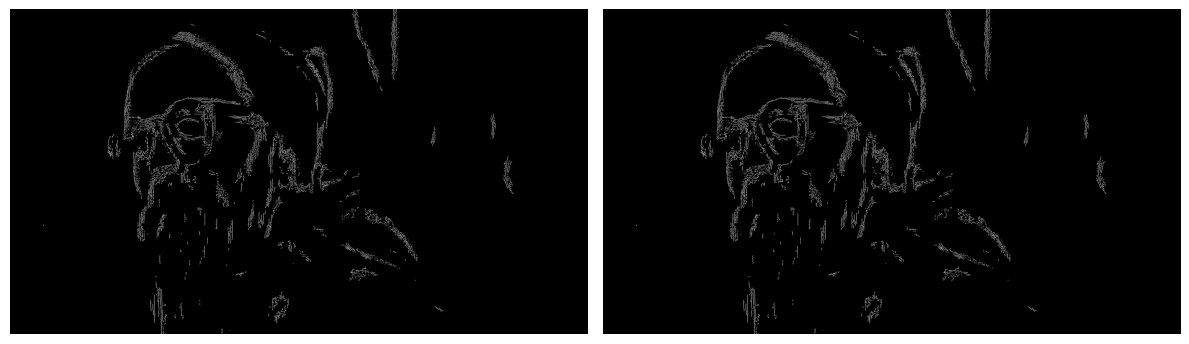

In [54]:
imagen = cv2.Canny(imagen_gris, umbral1_elegido, umbral2_elegido) # dejamos los umbrales normalmente (21,25)
imagen2 = cv2.Canny(imagen_gris, umbral2_elegido, umbral1_elegido) # invertimos los umbrales (25,21)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray') # primera imagen (imagen)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagen2, cmap='gray') # segunda imagen (imagen2)
plt.axis('off')
plt.tight_layout()
plt.show()

## Eso fué todo, muchas gracias por tomarte el tiempo de llegar hasta acá, saludos !

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>